> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# import data
df=pd.read_csv('tmdb-movies.csv')

df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# data type
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [4]:
# check columns that this dataset have
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# number of rows and columns
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [8]:
# check all NaN 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

#### Drop irrelevant data

In [10]:
# creating a list of column to be deleted
del_col=['id','imdb_id','budget','revenue','homepage',
        'keywords','overview','production_companies','vote_count','vote_average']

In [11]:
#deleting the columns
df=df.drop(del_col,1)

In [12]:
df.head()

,popularity,original_title,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [13]:
rows,col=df.shape
print('there are {} total entries of movies and {} no.of columns in it'.format(rows-1,col))

there are 10865 total entries of movies and 11 no.of columns in it


In [14]:
df.drop_duplicates(keep ='first', inplace=True)
rows,col=df.shape

print('There are now {} total entries of movies and {} no.of columns in it.'.format(rows-1, col))

There are now 10864 total entries of movies and 11 no.of columns in it.


#### removing 0's from budget and the revenue columns

In [15]:
# creating a seperate list of revenue and budget column
temp_list=['budget_adj','revenue_adj']

In [16]:
# this will replace all the value from '0' to NAN in the list
df[temp_list]=df[temp_list].replace(0,np.NAN)

In [17]:
# removing all the row which has NaN value in temp_list
df.dropna(subset = temp_list,inplace = True)

rows,col = df.shape

In [18]:
print('after removing such entries, we now have only{} no.of movies'.format(rows-1))

after removing such entries, we now have only3853 no.of movies


#### Changing the release data column into standard data format

In [19]:
df.release_date=pd.to_datetime(df['release_date'])

df.head()

,popularity,original_title,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,1.385749e+09


#### Replacing zero with NAN in runtime column

In [20]:
# replacing 0 with NaN of runtime column in the dataset
df['runtime']=df['runtime'].replace(0,np.NAN)

#### Changing format of budget and revenue column

In [22]:
df.dtypes

popularity               float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
popularity        3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
tagline           3574 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 361.3+ KB


In [24]:
change_type=['budget_adj','revenue_adj']
#chaning data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

popularity               float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
budget_adj                 int64
revenue_adj                int64
dtype: object

In [25]:
df.head(2)

,popularity,original_title,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b4e2c50>,
      dtype=object)

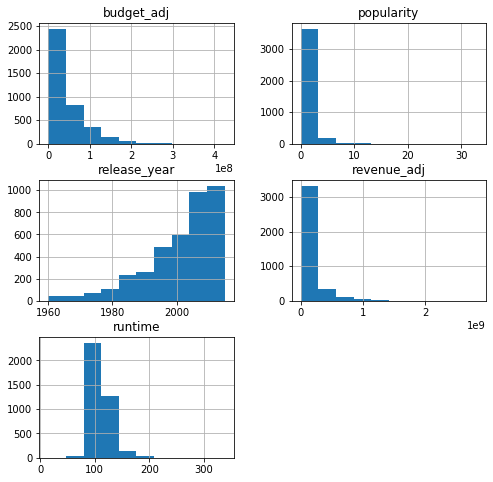

In [26]:
df.hist(figsize=(8,8))

In [27]:
df.describe()

,popularity,runtime,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,19.922820,11.282575,4.480925e+07,2.161114e+08
min,0.001117,15.000000,1960.000000,0.000000e+00,2.000000e+00
25%,0.462368,95.000000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: most and least profitable movies

In [28]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit_earned',df['revenue_adj']-df['budget_adj'])

#previewing the changes in the dataset
df.head(2)

,popularity,original_title,profit_earned,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,1254445953,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892
1,28.419936,Mad Max: Fury Road,210161353,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292


In [30]:
import pprint
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1329,2244
popularity,12.0379,0.25054
original_title,Star Wars,The Warrior's Way
profit_earned,2750136651,-413912431
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
tagline,"A long time ago in a galaxy far, far away...",Assassin. Hero. Legend.
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,1977-03-20 00:00:00,2010-12-02 00:00:00
release_year,1977,2010


#### column with id 1329 shows the hightest earned profit:2750136651

#### column with id 2244 showes the lowest earned profit: -413912431

### Research Question 2  Largest and Lowest budgets

In [31]:
calculate('budget_adj')

,2244,3581
popularity,0.25054,0.52043
original_title,The Warrior's Way,"Love, Wedding, Marriage"
profit_earned,-413912431,1335
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
tagline,Assassin. Hero. Legend.,Here comes the ride.
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,2011-06-03 00:00:00
release_year,2010,2011


#### column with id 2244 shows the largest budget: 425000000 dollar

#### whereas the column with id 3581 showes the smallest budget: 0 dollar

### Research Question 3: Movies with longest and shortest runtime

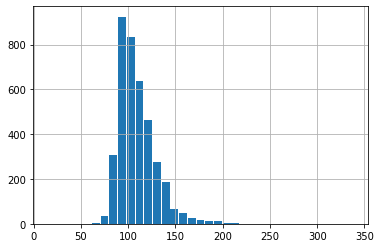

In [32]:
df['runtime'].hist(rwidth=0.9, bins =35)

In [33]:
calculate('runtime')

,2107,5162
popularity,0.534192,0.208637
original_title,Carlos,Kid's Story
profit_earned,-17128721,-6
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


#### Column with id 2018 shows the longest runtime: 338 minutes

#### Column with id 5162 shows the shrtest runtime: 15minutes

### Research Question 4: year of release vs profitability

In [34]:
# selecting the movies having profit $50M or more
profit_data = df[df['profit_earned'] >= 50000000]

# reindexing new data
profit_data.index = range(len(profit_data))

# we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

# printing the changed dataset
profit_data.head()

,popularity,original_title,profit_earned,cast,director,tagline,runtime,genres,release_date,release_year,budget_adj,revenue_adj
1,32.985763,Jurassic World,1254445953,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892
2,28.419936,Mad Max: Fury Road,210161353,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292
3,13.112507,Insurgent,170419070,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101199955,271619025
4,11.173104,Star Wars: The Force Awakens,1718723210,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,183999919,1902723129
5,9.335014,Furious 7,1210948878,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015,174799923,1385748801


In [35]:
len(profit_data)

1542

### Research Question 5: Popular Genres

In [36]:
def data(column):
    data = profit_data[column].str.cat(sep='|')
    
    data = pd.Series(data.split('|'))
    
    count = data.value_counts(ascending = False)
    
    return count

In [37]:
count = data('genres')

count.head()

Drama        579
Comedy       554
Action       515
Thriller     462
Adventure    418
dtype: int64

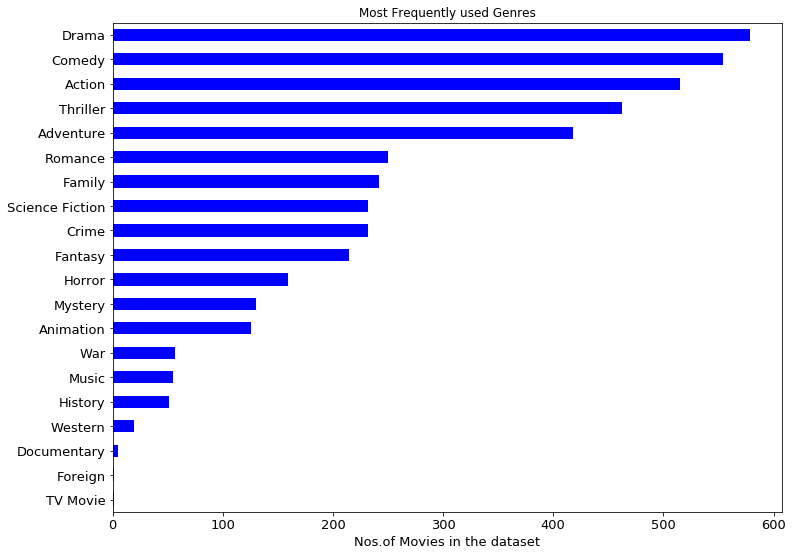

In [38]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = 'blue', fontsize = 13)

#title
lt.set(title = 'Most Frequently used Genres')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

plt.show()

### Research Question 6: Most Frequent Cast

In [39]:
# variable to store the returned value
count = data('cast')

# printing to 5 values

count.head()

Tom Cruise        29
Tom Hanks         25
Brad Pitt         25
Robert De Niro    23
Cameron Diaz      21
dtype: int64

In [40]:
def profit_avg(column):
    return profit_data[column].mean()

In [41]:
# average duration of the movies
profit_avg('runtime')

113.66990920881972

In [42]:
# average budget
profit_avg('budget_adj')

64357773.737354085

In [43]:
# average revenue
profit_avg('revenue_adj')

292607785.13942933

In [44]:
# average profit
profit_avg('profit_earned')

228250011.40207523

<a id='conclusions'></a>
## Conclusions

#### criterias for a Movie to be successful
>1. Genre must be Drama, Comedy, Action, Thriller and Adventure.
>2. most frequent casts for successful movies are: Tom Cruise, Brad Pitt, Tom Hanks, Robert De Niro and Sylvester Stallone.
>3. The average runtime for profitable movies is 113.67 minutes.
>4. the average revenue for profitbale movies is 254,957,662.59.
>5. the average budget for profitable movies is 60,444,957.76.

> if a movie has the characters i listed above, on average, earns 228,250,011.4 (228 million).


#### limitations:  my analysis was done by considering the movies with a profit of around 50 million dollar. this might not be completely right but by following these suggestions, one can finds the direction to make a profitable movie or sell the moives with same characters to make money.
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255